In [19]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC

import pickle

from analyseModel import results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from hyperparameterTuning import hyperparamTraining as hpt 

In [20]:
file = open('../../data/ML_models/model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

In [21]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']
columns = data['x_feature']

******************************
MODEL - OUTPUT
******************************

accuracy_score : 0.7530163236337828

classification report :
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1036
           1       0.52      0.73      0.61       373

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



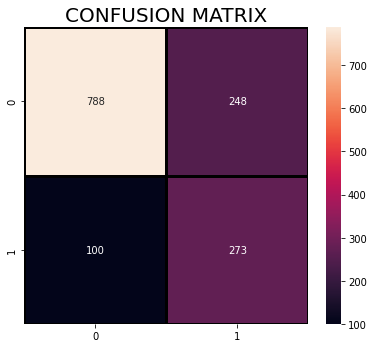

In [22]:
svc =SVC()

svc.fit(x_train,y_train)
results(svc, x_train, y_train, x_test, y_test, None, None)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
{'C': 10, 'kernel': 'rbf'}
SVC(C=10)
******************************
MODEL - OUTPUT
******************************

accuracy_score : 0.7508871540099361

classification report :
               precision    recall  f1-score   support

           0       0.89      0.75      0.82      1036
           1       0.52      0.75      0.61       373

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



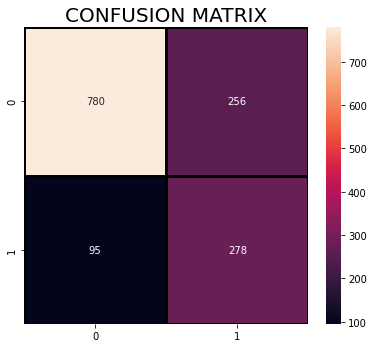

In [23]:
param = {
    'C': [i for i in range(10, 12, 14)],
    'kernel': ['linear', 'rbf']
}
svc =SVC()
svcModel = hpt(svc, x_train, y_train, x_test, y_test, param, None, None)

In [24]:
file = open('../../data/ML_models/svcModel.pkl', 'wb')
pickle.dump(svcModel, file)